In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
breast_cancer = load_breast_cancer()
keys = breast_cancer.keys()
keys

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
print(breast_cancer.feature_names)
print(type(breast_cancer.feature_names))
print(breast_cancer.feature_names.shape)

print('\n',breast_cancer.target_names)
print(type(breast_cancer.target_names))
print(breast_cancer.target_names.shape)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
<class 'numpy.ndarray'>
(30,)

 ['malignant' 'benign']
<class 'numpy.ndarray'>
(2,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=26)

In [5]:
dt_clf = DecisionTreeClassifier(random_state=26)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score
import numpy as np

np.round(accuracy_score(pred,y_test),6)

0.921053

In [8]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

np.random.seed(777)
card = pd.read_csv('creditcard.csv')

In [10]:
card.drop(['Time','Amount'], axis=1, inplace=True)

In [11]:
card.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [12]:
card['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [13]:
X_features = card.iloc[:,:-1]
y_target = card.iloc[:,-1]

scaler = MinMaxScaler()
df = scaler.fit_transform(X_features)

In [14]:
scaled_card = pd.DataFrame(df, columns = X_features.columns)
scaled_card.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,0.252484,0.680908,0.371591,0.635591,0.446084,0.434392,0.737173,0.655066,0.594863,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,0.381188,0.744342,0.486190,0.641219,0.383840,0.464105,0.727794,0.640681,0.551930,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,0.322422,0.706683,0.503854,0.640473,0.511697,0.357443,0.763381,0.644945,0.386683,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,0.271817,0.710910,0.487635,0.636372,0.289124,0.415653,0.711253,0.788492,0.467058,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,0.236355,0.724477,0.552509,0.608406,0.349419,0.434995,0.724243,0.650665,0.626060,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490


In [15]:
scaled_card['Class'] = y_target
scaled_card.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,0.252484,0.680908,0.371591,0.635591,0.446084,0.434392,0.737173,0.655066,0.594863,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,0.381188,0.744342,0.486190,0.641219,0.383840,0.464105,0.727794,0.640681,0.551930,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,0.322422,0.706683,0.503854,0.640473,0.511697,0.357443,0.763381,0.644945,0.386683,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,0.271817,0.710910,0.487635,0.636372,0.289124,0.415653,0.711253,0.788492,0.467058,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,0.236355,0.724477,0.552509,0.608406,0.349419,0.434995,0.724243,0.650665,0.626060,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0


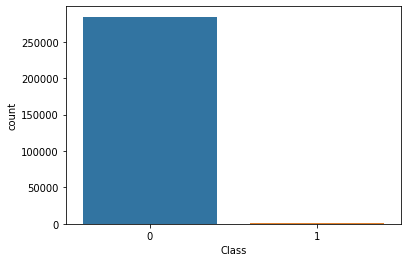

In [16]:
sns.countplot(scaled_card['Class'])

In [17]:
from sklearn import linear_model
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score

#Build the model
logistic = linear_model.LogisticRegression(C=1e5)

In [18]:
X_features.values

array([[-1.35980713e+00, -7.27811733e-02,  2.53634674e+00, ...,
        -1.89114844e-01,  1.33558377e-01, -2.10530535e-02],
       [ 1.19185711e+00,  2.66150712e-01,  1.66480113e-01, ...,
         1.25894532e-01, -8.98309914e-03,  1.47241692e-02],
       [-1.35835406e+00, -1.34016307e+00,  1.77320934e+00, ...,
        -1.39096572e-01, -5.53527940e-02, -5.97518406e-02],
       ...,
       [ 1.91956501e+00, -3.01253846e-01, -3.24963981e+00, ...,
        -8.73705959e-02,  4.45477214e-03, -2.65608286e-02],
       [-2.40440050e-01,  5.30482513e-01,  7.02510230e-01, ...,
         5.46668462e-01,  1.08820735e-01,  1.04532821e-01],
       [-5.33412522e-01, -1.89733337e-01,  7.03337367e-01, ...,
        -8.18267121e-01, -2.41530880e-03,  1.36489143e-02]])

In [19]:
y_target.values

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
skfold = StratifiedKFold(n_splits=5)
n_iter = 0
cv_accuracy=[]

for train_index, test_index in skfold.split(X_features.values, y_target):
    X_train, X_test = X_features.values[train_index], X_features.values[test_index]
    y_train, y_test = y_target[train_index], y_target[test_index]
    
    logistic.fit(X_train, y_train)
    pred = logistic.predict(X_test)
    n_iter +=1
    
    accuracy = accuracy_score(y_test,pred)
    
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    cv_accuracy.append(accuracy)
    
    print('{0} 교차 검증 정확도: {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter,accuracy,train_size,test_size))
    
print('\n 평균 검증 정확도: ', np.mean(cv_accuracy))

1 교차 검증 정확도: 0.9989817773252344, 학습 데이터 크기: 227845, 검증 데이터 크기: 56962
2 교차 검증 정확도: 0.9993328885923949, 학습 데이터 크기: 227845, 검증 데이터 크기: 56962
3 교차 검증 정확도: 0.9989466477063254, 학습 데이터 크기: 227846, 검증 데이터 크기: 56961
4 교차 검증 정확도: 0.999280209265989, 학습 데이터 크기: 227846, 검증 데이터 크기: 56961
5 교차 검증 정확도: 0.9990344270641316, 학습 데이터 크기: 227846, 검증 데이터 크기: 56961

 평균 검증 정확도:  0.9991151899908151


In [21]:
# 위에서 미리 지정했었습니다.
df_x = X_features
df_y = y_target

In [22]:
# 학습데이터/테스트데이터 단순 분할 방법
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logistic, df_x, df_y, scoring='accuracy', cv=5)
print('교차 검증별 정확도:',scores)
print('평균 검증 정확도:',np.mean(scores))

교차 검증별 정확도: [0.99898178 0.99933289 0.99894665 0.99928021 0.99903443]
평균 검증 정확도: 0.9991151899908151


In [23]:
# 학습데이터/테스트데이터로 나눈 후, 학습데이터만으로 교차검증
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0)
scores = cross_val_score(logistic, X_train, y_train, scoring='accuracy', cv=5)
print('교차 검증별 정확도:',scores)
print('평균 검증 정확도:',np.mean(scores))

교차 검증별 정확도: [0.99910027 0.99920999 0.99918804 0.99927582 0.99907832]
평균 검증 정확도: 0.9991704887094297


In [25]:
pip install category_encoders

     |████████████████████████████████| 81kB 3.5MB/s 


In [27]:
from google.colab import files
uploaded = files.upload()

Saving cardio_train.csv to cardio_train.csv


In [28]:
import pandas as pd
from scipy.stats import randint, uniform
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

#데이터 불러오기
df= pd.read_csv('cardio_train.csv',sep=';')
df.head()

#pipeline 알고리즘 사용
pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(random_state=2)
)

#hyper-parameter를 딕셔너리 형태로
dists = {
    'simpleimputer__strategy': ['mean', 'median', 'most_frequent'], 
    'randomforestclassifier__n_estimators': randint(50, 500), 
    'randomforestclassifier__max_depth': [5, 10, 15, 20, None], 
    'randomforestclassifier__max_features': uniform(0, 1)
}

In [29]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [30]:
X = df.drop('cardio', axis=1)
y = df['cardio']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 )

In [32]:
rs = RandomizedSearchCV(pipe,
                        param_distributions = dists,
                        n_iter=5,
                        cv=3,
                        scoring='accuracy',
                        verbose=1,
                        n_jobs=-1)

rs

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('ordinalencoder',
                                              OrdinalEncoder(cols=None,
                                                             drop_invariant=False,
                                                             handle_missing='value',
                                                             handle_unknown='value',
                                                             mapping=None,
                                                             return_df=True,
                                                             verbose=0)),
                                             ('simpleimputer',
                                              SimpleImputer(add_indicator=False,
                                                            copy=True,
                                                            fill_value=None,


In [33]:
rs.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('ordinalencoder',
                                              OrdinalEncoder(cols=None,
                                                             drop_invariant=False,
                                                             handle_missing='value',
                                                             handle_unknown='value',
                                                             mapping=None,
                                                             return_df=True,
                                                             verbose=0)),
                                             ('simpleimputer',
                                              SimpleImputer(add_indicator=False,
                                                            copy=True,
                                                            fill_value=None,


In [36]:
import random

In [38]:
random.randint(50, 500)

411

In [40]:
random.uniform(0, 1)

0.32511569052940537

In [42]:
df = pd.DataFrame(rs.cv_results_)

In [43]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__max_features,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,16.069749,0.150717,1.960290,0.044165,None,0.100022,265,median,"{'randomforestclassifier__max_depth': None, 'r...",0.725029,0.726743,0.722800,0.724857,0.001614,4
1,15.872833,1.055409,1.281554,0.034726,15,0.246351,285,mean,"{'randomforestclassifier__max_depth': 15, 'ran...",0.735029,0.733943,0.731943,0.733638,0.001278,3
2,6.532516,0.048837,0.499698,0.007253,None,0.284748,71,median,"{'randomforestclassifier__max_depth': None, 'r...",0.723029,0.723371,0.719371,0.721924,0.001810,5
3,24.163131,0.054544,0.705064,0.007135,5,0.764787,363,mean,"{'randomforestclassifier__max_depth': 5, 'rand...",0.739714,0.732114,0.731200,0.734343,0.003816,1
4,13.243848,0.783332,0.822142,0.113396,15,0.291756,207,most_frequent,"{'randomforestclassifier__max_depth': 15, 'ran...",0.733771,0.734400,0.732857,0.733676,0.000633,2


In [44]:
y_predict = rs.best_estimator_.predict(X_test)

In [50]:
print('테스트 데이터 세트 f1스코어: {0:.4f}'.format(f1_score(y_test, y_predict)))

테스트 데이터 세트 f1스코어: 0.7155


In [51]:
dists = {
    'simpleimputer__strategy': ['mean', 'median', 'most_frequent'], 
    'randomforestclassifier__max_depth': [5, 10]
}

In [54]:
gs = GridSearchCV(pipe,
                 cv=3,
                 param_grid=dists,
                 refit=True # 디폴트가 True
)

In [55]:
gs.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('ordinalencoder',
                                        OrdinalEncoder(cols=None,
                                                       drop_invariant=False,
                                                       handle_missing='value',
                                                       handle_unknown='value',
                                                       mapping=None,
                                                       return_df=True,
                                                       verbose=0)),
                                       ('simpleimputer',
                                        SimpleImputer(add_indicator=False,
                                                      copy=True,
                                                      fill_value=None,
                                                      missing_values=nan,
          

In [56]:
scores_df = pd.DataFrame(gs.cv_results_)
scores_df = scores_df[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]
scores_df

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'randomforestclassifier__max_depth': 5, 'simp...",0.729467,4,0.733486,0.731371,0.723543
1,"{'randomforestclassifier__max_depth': 5, 'simp...",0.729467,4,0.733486,0.731371,0.723543
2,"{'randomforestclassifier__max_depth': 5, 'simp...",0.729467,4,0.733486,0.731371,0.723543
3,"{'randomforestclassifier__max_depth': 10, 'sim...",0.735105,1,0.737314,0.736800,0.731200
4,"{'randomforestclassifier__max_depth': 10, 'sim...",0.735105,1,0.737314,0.736800,0.731200
5,"{'randomforestclassifier__max_depth': 10, 'sim...",0.735105,1,0.737314,0.736800,0.731200


In [57]:
print('최적 파라미터:', gs.best_params_)
print('최고 정확도:{0:.4f}'.format(gs.best_score_))

최적 파라미터: {'randomforestclassifier__max_depth': 10, 'simpleimputer__strategy': 'mean'}
최고 정확도:0.7351


In [58]:
best_estimator = gs.best_estimator_

pred = best_estimator.predict(X_test)
print('테스트 데이터 세트 정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도:0.7334
